# Sample points in a box

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import scipy as sp
import itertools

In [2]:
def AlphaComplex(points, thresh):
    ''' Takes a point cloud (Npoints x Ndims) and returns the Alpha complex at threshold thresh '''
    
    NPoints = points.shape[0]
    
    #build the circumsphere
    def circumsphereRad(P):
        '''
        Inspired from Yohai Rehani
        :param P: array Nxd of N points of dimension d
        :return: center and squared radius of the circum-sphere of P
        '''
        p1 = P[0, :]
        A = P[1:, :] - p1
        Pnorm = np.sum(np.power(P, 2), 1)
        b = 0.5*(Pnorm[1:] - Pnorm[0])
        invA = np.linalg.pinv(A)
        c0 = invA.dot(b)
        F = sp.linalg.null_space(A)
        if F.size != 0:
            z = np.transpose(F).dot(p1-c0)
            c = c0 + F.dot(z)
        else:
            c = c0
        R = np.sum(np.power(p1-c, 2))
        return R

    Del = Delaunay(points)
    #triangles = points[Del.simplices]
    
    TriList = [ t for t in Del.simplices if np.sqrt(circumsphereRad(points[t])) <= thresh ]
    TriList = [ np.array(sorted(t)) for t in TriList ]
    
    EdgeList = []
    CandidateEdges = []
    
    for t in Del.simplices:
        
        
        e1 = tuple(sorted((t[0] ,t[1])))
        e2 = tuple(sorted((t[0] ,t[2])))
        e3 = tuple(sorted((t[1] ,t[2])))  
        
        CandidateEdges.extend( [e1,e2,e3] )
        
    CandidateEdges = list(set(CandidateEdges))
    
    for e in CandidateEdges:
        
        if circumsphereRad(points[[e[0],e[1]],:]) <= thresh**2 :
            
            EdgeList.append(  (e[0],e[1]) )
                  
                
    EdgeList = [ np.array(e) for e in EdgeList ]
    
    return TriList, EdgeList
    

In [3]:
def draw_2d_simplicial_complex(simplices, pos=None, return_pos=False, fig = None, markedEdges=None):
    """
    Draw a simplicial complex up to dimension 2 from a list of simplices, as in [1].
        
        Args
        ----
        simplices: list of lists of integerss
            List of simplices to draw. Sub-simplices are not needed (only maximal).
            For example, the 2-simplex [1,2,3] will automatically generate the three
            1-simplices [1,2],[2,3],[1,3] and the three 0-simplices [1],[2],[3].
            When a higher order simplex is entered only its sub-simplices
            up to D=2 will be drawn.
        
        pos: dict (default=None)
            If passed, this dictionary of positions d:(x,y) is used for placing the 0-simplices.
            The standard nx spring layour is used otherwise.
           
        ax: matplotlib.pyplot.axes (default=None)
        
        return_pos: dict (default=False)
            If True returns the dictionary of positions for the 0-simplices.
            
        References
        ----------    
        .. [1] I. Iacopini, G. Petri, A. Barrat & V. Latora (2018)
               "Simplicial Models of Social Contagion".
               arXiv preprint arXiv:1810.07031..
    """

    
    #List of 0-simplices
    nodes =list(set(itertools.chain(*simplices)))
    
    #List of 1-simplices
    edges = list(set(itertools.chain(*[[tuple(sorted((i, j))) for i, j in itertools.combinations(simplex, 2)] for simplex in simplices])))

    #List of 2-simplices
    triangles = list(set(itertools.chain(*[[tuple(sorted((i, j, k))) for i, j, k in itertools.combinations(simplex, 3)] for simplex in simplices])))
    
    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_xlim([0, 270])      
    ax.set_ylim([0, 270])
    ax.set_xlim([-.1, 1.1])      
    ax.set_ylim([-.1, 1.1])
    ax.get_xaxis().set_ticks([])  
    ax.get_yaxis().set_ticks([])
    ax.axis('on')
       
    if pos is None:
        # Creating a networkx Graph from the edgelist
        G = nx.Graph()
        G.add_edges_from(edges)
        # Creating a dictionary for the position of the nodes
        pos = nx.spring_layout(G)
        
    # Drawing the edges
    for i, j in edges:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        line = plt.Line2D([ x0, x1 ], [y0, y1 ],color = 'blue', zorder = 1, lw=1.5)
        ax.add_line(line);
    
    # Filling in the triangles
    for i, j, k in triangles:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        (x2, y2) = pos[k]
        tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
                          edgecolor = 'white', facecolor = plt.cm.Blues(0.6),
                          zorder = 2, alpha=0.4, lw=0.5)
        ax.add_patch(tri);
        
    # AGGIUNTA MIA 
    # HIGHLIGHTED EDGES
    if markedEdges is not None:
            for i,j in markedEdges:
                (x0 , y0) = pos[i]
                (x1 , y1) = pos[j]
                line = plt.Line2D([ x0, x1 ], [y0, y1 ],color = u'#ff7f0e', zorder = 3, lw=2)
                ax.add_line(line);

    # Drawing the nodes 
    #for i in nodes:
    for i in range(len(pos)):
        (x, y) = pos[i]
        #  radius was 0.1
        circ = plt.Circle([ x, y ], radius = 0.01, zorder = 4, lw=0.5,
                          edgecolor = 'Black', facecolor = u'#ff7f0e')
        ax.add_patch(circ);
        
#     for i in nodes:
        
#         (x, y) = posLabels[i]
#         string = ' $x_{' + str(i) + '}$'
        
#         ax.text(x,y,string, color='black')
        

    #return fig


In [4]:
np.random.seed(42)

In [5]:
points = np.random.random_sample(size=(30,2))

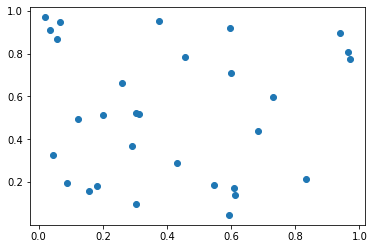

In [6]:
plt.scatter(points[:,0], points[:,1])

In [7]:
Triangles, Edges = AlphaComplex(points, .15)

In [8]:
triangles = [ t.tolist() for t in Triangles ]
edges = [ e.tolist() for e in Edges ]

In [9]:
L = triangles + edges

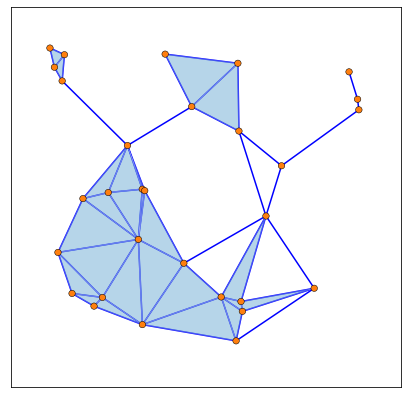

In [10]:
draw_2d_simplicial_complex(L, pos=points)

# Extend to topological disk
Simply increase the radius of the Alpha complex until it is filled

In [11]:
TrianglesM, EdgesM = AlphaComplex(points, 1)
trianglesM = [ t.tolist() for t in TrianglesM ]
edgesM = [ e.tolist() for e in EdgesM ]
M = trianglesM + edgesM

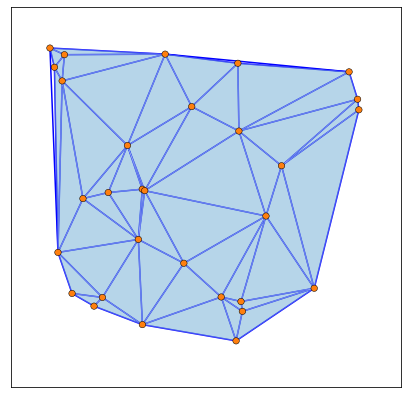

In [12]:
draw_2d_simplicial_complex(M, pos=points)

## 

In [13]:
points = np.random.random_sample((4,2))

In [14]:
Triangles, Edges = AlphaComplex(points, .5)

In [15]:
Triangles

[array([0, 1, 2], dtype=int32)]

In [16]:
Edges

[array([0, 1], dtype=int32),
 array([1, 2], dtype=int32),
 array([0, 3], dtype=int32),
 array([2, 3], dtype=int32),
 array([0, 2], dtype=int32),
 array([1, 3], dtype=int32)]

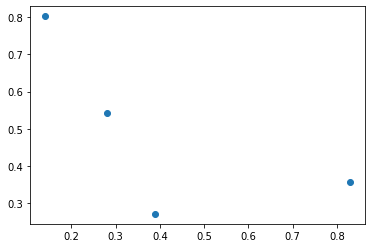

In [17]:
plt.scatter(points[:,0], points[:,1])

In [18]:
Delaunay(points).simplices

array([[2, 1, 3],
       [0, 2, 3],
       [2, 0, 1]], dtype=int32)

In [19]:
def getAlphaComplex(points, thresh):
    TrianglesM, EdgesM = AlphaComplex(points, thresh)
    trianglesM = [ t.tolist() for t in TrianglesM ]
    edgesM = [ e.tolist() for e in EdgesM ]
    M = trianglesM + edgesM
    
    return M

In [20]:
getAlphaComplex(points, 0.2)

[[2, 3], [0, 2]]